In [2]:
import numpy as np

from matplotlib import pyplot as plt

import scipy as sp

from scipy.integrate import fixed_quad as quad

import numbers

In [3]:
L = 20
R = 1
Lcap = 1.5*R
Lmid = L - 3*R

In [4]:
t = np.linspace(-1,1,1000)[1:-1]

In [5]:
a = np.array([1])

In [6]:
def fn_psi(t):
    if isinstance(t,numbers.Number):
        if abs(t) >= 1: return 0
        return ((t**2+1)*np.exp(4*t/(t**2-1)))/((t**2-1)*(1+np.exp(4*t/(t**2-1))))**2

    ret = ((t**2+1)*np.exp(4*t/(t**2-1)))/((t**2-1)*(1+np.exp(4*t/(t**2-1))))**2
    ret[abs(ret)>=1] = 0
    return ret

def fn_Psi(t):
    if isinstance(t,numbers.Number):
        if t >= 1: return 1/8
        if t <= -1: return -1/8
        return -np.tanh(-2*t/(1-t**2))/8
    ret = -np.tanh(-2*t/(1-t**2))/8        
    ret[t>=1] = 1/8
    ret[t<=-1] = -1/8
    return ret

In [7]:
Psi = fn_Psi(t)
psi = fn_psi(t)

/tmp/ipykernel_16845/4164235153.py:6: RuntimeWarning: overflow encountered in exp
  ret = ((t**2+1)*np.exp(4*t/(t**2-1)))/((t**2-1)*(1+np.exp(4*t/(t**2-1))))**2
/tmp/ipykernel_16845/4164235153.py:6: RuntimeWarning: overflow encountered in square
  ret = ((t**2+1)*np.exp(4*t/(t**2-1)))/((t**2-1)*(1+np.exp(4*t/(t**2-1))))**2
/tmp/ipykernel_16845/4164235153.py:6: RuntimeWarning: invalid value encountered in divide
  ret = ((t**2+1)*np.exp(4*t/(t**2-1)))/((t**2-1)*(1+np.exp(4*t/(t**2-1))))**2


In [11]:
g1_hat = R*Psi/fn_Psi(1)
b = Lcap/quad(fn_Psi,0,1,n=128)[0]
g2_hat = Lmid/2 - b*np.array([quad(fn_Psi,0,tt,n=128)[0] for tt in t])

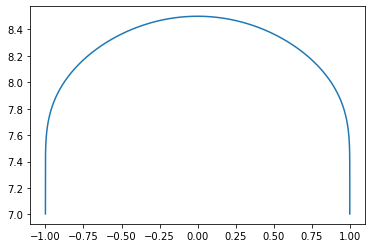

In [14]:
plt.plot(g1_hat,g2_hat)